# Gridagem e processamento dos dados do Complexo de Anitápolis, SC

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import verde as vd

In [2]:
import transformation

## Lendo os dados reais

In [3]:
filename = 'data_XYZ_area'

In [4]:
names = ['X','Y','GPSALT','ALTURA','LONG','LAT','MAGIGRF']

In [5]:
data = pd.read_csv(filename,usecols=(0,1,2,3,4,5,6),
                   names=names,sep=' ',
                   skipinitialspace=True,
                   na_filter=True).fillna(0)

In [6]:
data.shape

(65549, 7)

## Anomalia de Campo Total

In [7]:
tfa_obs = data.iloc[:,6].values

In [8]:
x = data.iloc[:,1].values
y = data.iloc[:,0].values

In [9]:
GPSALT = data.iloc[:,2].values

In [10]:
GPSALT.min()

631.45

In [11]:
z = - GPSALT + 631.45

In [12]:
height = z.mean()

In [13]:
height

-496.5595780255991

In [14]:
z = -500.*np.ones_like(z)

### Direção do campo principal

In [15]:
inc_gf = -37.5
dec_gf = -18.15

In [16]:
main_field = inc_gf,dec_gf 

In [17]:
print('Main field inclination: %.1f degree' % inc_gf)
print('Main field declination: %.1f degree' % dec_gf)

Main field inclination: -37.5 degree
Main field declination: -18.1 degree


## Real data visualization

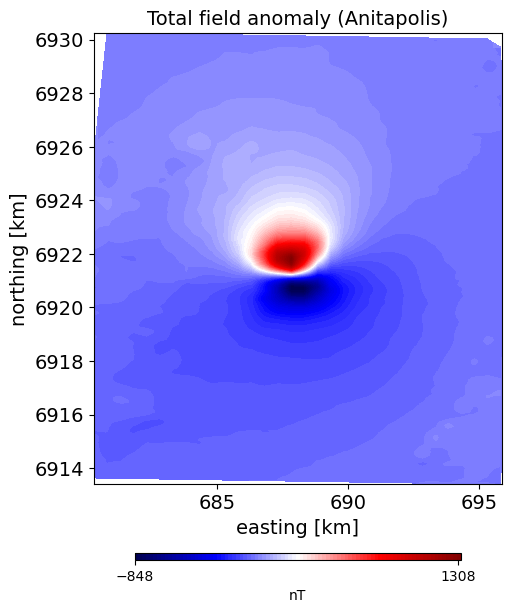

In [18]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(5,6), layout='constrained')

plt.title('Total field anomaly (Anitapolis)', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.xlim(1e-3*y.min(),1e-3*y.max())
plt.ylim(1e-3*x.min(),1e-3*x.max())
plt.tricontourf(1e-3*y,1e-3*x,tfa_obs,100,cmap='seismic')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT',ticks=[tfa_obs.min(), tfa_obs.max()])
cb.ax.tick_params(labelsize=10)

file_name = 'images/raw_data_anitapolis'
plt.savefig(file_name+'.png',dpi=200)
plt.show()

## Gridando os dados de Anitápolis

In [19]:
grd = vd.KNeighbors(k=5).fit((y,x,z), tfa_obs)
west = min(y)
east = max(y)
south = min(x)
north = max(x)

In [20]:
region = (west,east,south,north)
shape = (600,30)
easting,northing = vd.grid_coordinates(region=region, shape=shape)
coordinates = (easting,northing,z)

In [21]:
tfa_grd = grd.predict(coordinates)

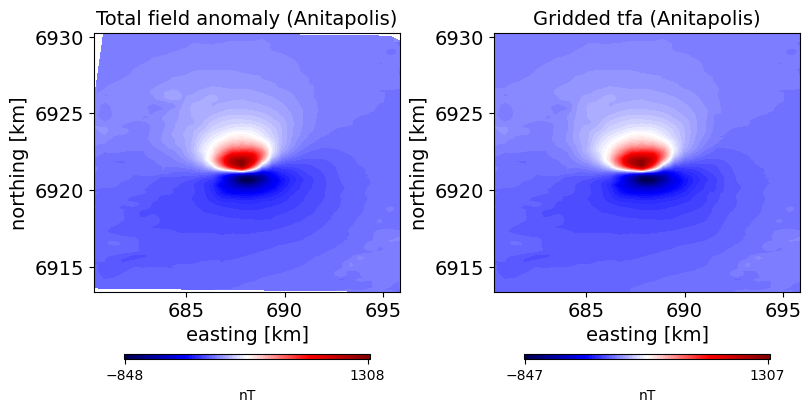

In [22]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(8,4), layout='constrained')

ranges = np.abs(tfa_obs.min())
plt.subplot(121)
plt.title('Total field anomaly (Anitapolis)', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.xlim(1e-3*y.min(),1e-3*y.max())
plt.ylim(1e-3*x.min(),1e-3*x.max())
plt.tricontourf(1e-3*y,1e-3*x,tfa_obs,100, cmap='seismic')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT',ticks=[tfa_obs.min(), tfa_obs.max()])
cb.ax.tick_params(labelsize=10)

plt.subplot(122)
plt.title('Gridded tfa (Anitapolis)', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.xlim(1e-3*easting.min(),1e-3*easting.max())
plt.ylim(1e-3*northing.min(),1e-3*northing.max())
plt.contourf(1e-3*easting,1e-3*northing,tfa_grd,100, cmap='seismic')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT',ticks=[tfa_grd.min(), tfa_grd.max()])
cb.ax.tick_params(labelsize=10)

file_name = 'images/gridded_TFA_MSJ'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Continuação para cima 

In [23]:
height = 500.
tfa_up = transformation.upward_continuation(coordinates,tfa_grd,height)

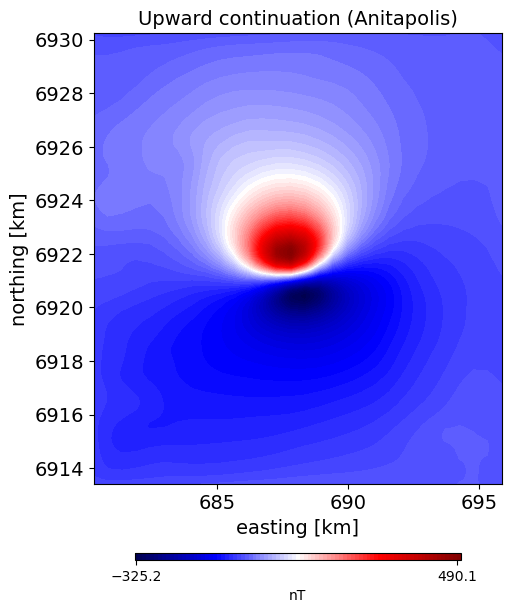

In [24]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(5,6), layout='constrained')

plt.title('Upward continuation (Anitapolis)', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.xlim(1e-3*easting.min(),1e-3*easting.max())
plt.ylim(1e-3*northing.min(),1e-3*northing.max())
plt.contourf(1e-3*easting,1e-3*northing,tfa_up,100, cmap='seismic')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT',ticks=[tfa_up.min(), tfa_up.max()])
cb.ax.tick_params(labelsize=10)

file_name = 'images/upward_TFA'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Redução ao polo

In [25]:
I0,D0 = -37.,-18.
Ir,Dr = -21.,-11.
tfa_pole = transformation.reduction_to_pole(coordinates,tfa_grd,(Ir,Dr),(I0,D0))

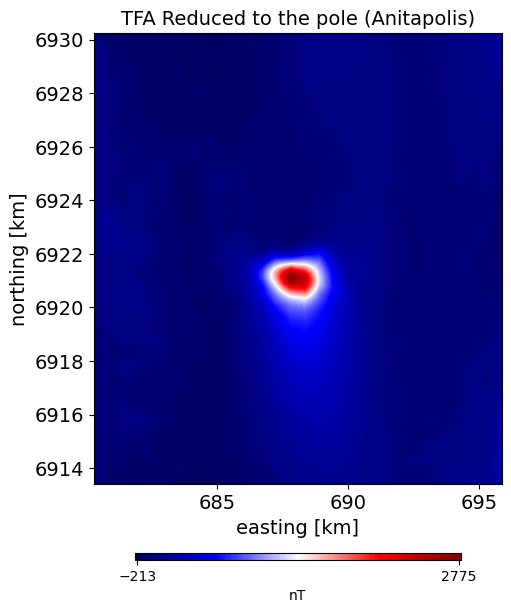

In [26]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(5,6), layout='constrained')

plt.title('TFA Reduced to the pole (Anitapolis)', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.xlim(1e-3*easting.min(),1e-3*easting.max())
plt.ylim(1e-3*northing.min(),1e-3*northing.max())
plt.contourf(1e-3*easting,1e-3*northing,tfa_pole,100, cmap='seismic')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT',ticks=[tfa_pole.min(), tfa_pole.max()])
cb.ax.tick_params(labelsize=10)

file_name = 'images/RTP_TFA'
plt.savefig(file_name+'.png',dpi=300)

plt.show()